# Spatial Autocorrelation Ethnicity

In [1]:
# to read and wrangle data
import pandas as pd

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
eindex=gpd.read_file("ethnicityindex.geojson")
eindex.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7433 entries, 0 to 7432
Data columns (total 60 columns):
 #   Column                                                                Non-Null Count  Dtype   
---  ------                                                                --------------  -----   
 0   GEOID_left                                                            7433 non-null   object  
 1   NAME_left                                                             7433 non-null   object  
 2   Total_2019                                                            7433 non-null   float64 
 3   Non Hispanic_2019                                                     7433 non-null   float64 
 4   Non Hispanic White_2019                                               7433 non-null   float64 
 5   Non Hispanic Black_2019                                               7433 non-null   float64 
 6   Non Hispanic American Indian and Alaska Native_2019                   7433 non-n

In [3]:
eindex = eindex.to_crs(epsg=3857)

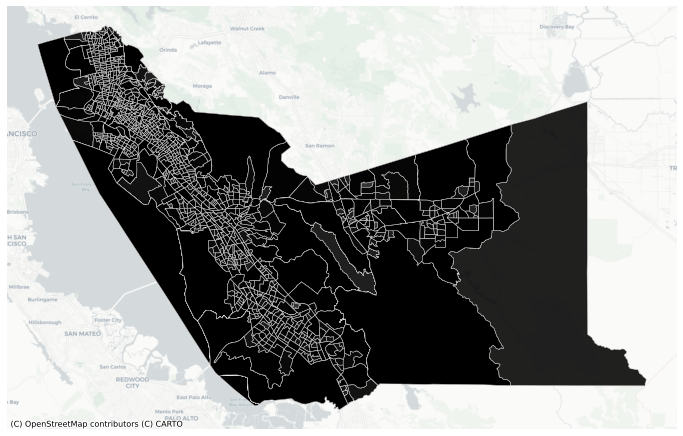

In [4]:
# plot it!
fig, ax = plt.subplots(figsize=(12,12))

eindex.plot(ax=ax,
         color='black', 
         edgecolor='white',
         lw=0.5,
         alpha=0.4)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [12]:
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(eindex, k=8)

# Row-standardization
wq.transform = 'r'

ValueError: list.remove(x): x not in list

In [6]:
# create a new column for the spatial lag
eindex['iqv_2019_sq_lag'] = lps.weights.lag_spatial(wq, eindex['iqv_2019_sq'])

NameError: name 'wq' is not defined

In [ ]:
# create a column that calculates the difference betwen arrests and lag
eindex['iqv_2019_sq_diff'] = eindex['iqv_2019_sq'] - eindex['iqv_2019_sq_lag']

In [ ]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# spatial lag choropleth
eindex.plot(ax=ax,
         figsize=(15,15),
         column='iqv_2019_sq_lag',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='quantiles')

ax.axis('off')
ax.set_title('2019 Diversity',fontsize=22)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
# create the 1x2 subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 12))

# two subplots produces ax[0] (left) and ax[1] (right)

# regular count map on the left
eindex.plot(ax=ax[0], # this assigns the map to the left subplot
         column='iqv_2019_sq', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75, 
           )


ax[0].axis("off")
ax[0].set_title("Arrests per 1000")

# spatial lag map on the right
eindex.plot(ax=ax[1], # this assigns the map to the right subplot
         column='iqv_2019_sq_lag', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=5, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75
           )

ax[1].axis("off")
ax[1].set_title("2019 Diversity - Spatial Lag")

plt.show()